# **Programing for Artificial Intelligence**

Submitted by:

*   Syeda ALeeza Tahir
        FA22-BAI-038
*   Muniba Manaal
         FA22_BAI-032



#About Dataset:

FER2013 is a significant dataset in facial expression recognition, comprising 35,887 grayscale images labeled with seven emotions. These emotions include anger, disgust, fear, happiness, sadness, surprise, and neutral. The dataset is split into a training set of 28,709 images and a test set of 3,589 images per class. Its utility lies in its use for training and evaluating various machine learning and deep learning models, contributing to advancements in automatic facial expression recognition.

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fer2013:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F786787%2F1351797%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240528%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240528T163757Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D65e67a7799b67a47c561dd18aeb59c57888ca9150026630b4153a061fb911cdd7f1693c7229800d4bd817e9ccf5a164c7868b1543cc9bb484e4c4291f85fe6322d129b04d4e18214f0fcff8999ea7ed50b5ce23d0320d04f4509362940d6fa94398e3f84144e3c43b23d7377297c65d3636046aacdef5ef903d99af69fe97146a1ad074498452848da1651e305097cbdb8132202ee7565fb1fb133ee473b54500ea64783b4ba565707e5f3ef8d0cd4513ade47ac1d40243920ed0c15728f4e38ccc7b2258fe1419f7fafea2fa66606a0d7eec1ebb3293a5e2da2cd93bdf64c95ae1505fa9db67d618f2cfc72ed1d6a6b2e439ad814b1194062a9f3f748dabc00'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 63252113 bytes downloaded
Downloaded and uncompressed: fer2013
Data source import complete.


Here we download the dataset from a specified URL, extracts it, and places it in the '/kaggle/input' directory. This allows easy access to the dataset for further analysis or machine learning tasks within the notebook.

# Setting up Kaggle Directory

In [2]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 55% 33.0M/60.3M [00:00<00:00, 139MB/s] 
100% 60.3M/60.3M [00:00<00:00, 174MB/s]


In [4]:
!unzip /content/fer2013.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/sad/Training_65242339.jpg  
  inflating: /content/train/sad/Training_65267116.jpg  
  inflating: /content/train/sad/Training_65275626.jpg  
  inflating: /content/train/sad/Training_6529266.jpg  
  inflating: /content/train/sad/Training_65329617.jpg  
  inflating: /content/train/sad/Training_65338712.jpg  
  inflating: /content/train/sad/Training_65338797.jpg  
  inflating: /content/train/sad/Training_65387162.jpg  
  inflating: /content/train/sad/Training_65404494.jpg  
  inflating: /content/train/sad/Training_65426218.jpg  
  inflating: /content/train/sad/Training_65430136.jpg  
  inflating: /content/train/sad/Training_65437377.jpg  
  inflating: /content/train/sad/Training_6545735.jpg  
  inflating: /content/train/sad/Training_65463385.jpg  
  inflating: /content/train/sad/Training_65473985.jpg  
  inflating: /content/train/sad/Training_65502829.jpg  
  inflating: /content/train/sad/Training_65505359.jpg  

# Installing Packages

In [5]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imghdr
import tensorflow as tf
from PIL import Image
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.applications import VGG16, ResNet50V2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard, CSVLogger
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import plot_model

This Python code imports several libraries commonly used for image processing, deep learning, and evaluation tasks. Here's a summary of each imported library:

1. **os**: Provides functions for interacting with the operating system, such as file manipulation.

2. **random**: Allows generating random numbers or shuffling sequences randomly.

3. **numpy as np**: NumPy is a library for numerical computations in Python, and it is commonly aliased as `np`.

4. **pandas as pd** : Pandas is a powerful data manipulation library in Python, often used for working with structured data.

5.** matplotlib.pyplot as plt**: Matplotlib is a plotting library for Python, and `pyplot` is a sub-module that provides a MATLAB-like interface for plotting.

6. **cv2**: OpenCV (Open Source Computer Vision Library) is a library of programming functions mainly aimed at real-time computer vision.

7. **imghdr**: Provides functions to determine the type of image contained in a file or byte stream.

8. **tensorflow as tf**: TensorFlow is a popular deep learning framework developed by Google.

9. **PIL.Image**: PIL (Python Imaging Library) is a library for opening, manipulating, and saving many different image file formats.

10. **seaborn as sns**: Seaborn is a statistical data visualization library built on top of Matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.

11. From **sklearn.metrics**:
    - `confusion_matrix`: Computes the confusion matrix to evaluate the accuracy of a classification.
    - `classification_report`: Generates a text report showing the main classification metrics.
    - `roc_curve`: Computes the Receiver Operating Characteristic (ROC) curve.
    - `auc`: Computes the Area Under the Curve (AUC) from the ROC curve.

12. **compute_class_weight** from `sklearn.utils.class_weight`: Computes class weights for imbalanced datasets.

13. From **tensorflow.keras**:
    - `layers`: Provides various layers for building deep learning models.
    - `models`: Allows creating and manipulating deep learning models.
    - `regularizers`: Provides regularizers to apply penalties on layer parameters during optimization.
    - `optimizers`: Contains optimization algorithms for training deep learning models.
    - `callbacks`: Callbacks are functions that can be applied at certain stages of the training process.
    - `preprocessing.image`: Provides utilities for image data preprocessing, such as loading and augmentation.

14. From **tensorflow.keras.applications**:
    - `VGG16`, `ResNet50V2`: Pre-trained deep learning models available in TensorFlow for image classification.

15. From **tensorflow.keras.layers**: Various types of layers used in constructing deep learning models.

16. From **tensorflow.keras.models**: Provides functions for building and manipulating neural network models.

17. **plot_model** from **keras.utils**: Allows visualizing the structure of a Keras model as a graph.

Overall, these libraries provide a comprehensive toolkit for working with images, building deep learning models, evaluating model performance, and visualizing results.

# Setting up Directory to save model data.

In [6]:
os.makedirs('test_dir', exist_ok=True)

In [7]:
# Define your project name
project_name = 'FER_2013_Emotion_Detection'

# List your models
model_names = [
    'Custom_CNN_From_Scratch',
    'Custom_CNN_With_Augmentation'
]

# Base directory (in this case, your Google Colab workspace)
base_dir = '/content/'

# Create the project directory
project_dir = os.path.join(base_dir, project_name)
os.makedirs(project_dir, exist_ok=True)

# Create a subdirectory for each model
for each_model in model_names:
    model_dir = os.path.join(project_dir, each_model)
    os.makedirs(model_dir, exist_ok=True)
    # Example subdirectories for model-related files
    # os.makedirs(os.path.join(model_dir, 'checkpoints'), exist_ok=True)
    # os.makedirs(os.path.join(model_dir, 'logs'), exist_ok=True)
    # os.makedirs(os.path.join(model_dir, 'saved_models'), exist_ok=True)

print(f'Project directory structure created at: {project_dir}')


Project directory structure created at: /content/FER_2013_Emotion_Detection


This code is useful for organizing your project files and directories, making it easier to manage and navigate through different components of the project, such as models, checkpoints, logs, etc.

# Data Cleaning

In [8]:
# Define the list of acceptable image extensions
image_exts = ['jpeg', 'jpg', 'png']

# Path to the directory containing image classes and possibly other nested subdirectories
data_dir = '/content/train'

# Walk through all directories and files in the dataset
for root, dirs, files in os.walk(data_dir):
    for file in files:
        # Construct the path to the current file
        file_path = os.path.join(root, file)

        try:
            # Check the file type of the current file
            file_type = imghdr.what(file_path)

            # If the file extension is not in the allowed list, remove it
            if file_type not in image_exts:
                print(f'Image not in ext list {file_path}')
                os.remove(file_path)
            else:
                # Proceed to process the image if needed, for example, reading it with OpenCV
                img = cv2.imread(file_path)

        except Exception as e:
            # Print out the issue and the path of the problematic file
            print(f'Issue with file {file_path}. Error: {e}')
            # Optionally, remove files that cause exceptions
            os.remove(file_path)

Data cleaning is crucial for our project using the FER2013 dataset. It ensures data quality by removing noise, outliers, and corrupted images. By preventing biases, it helps in achieving balanced model performance and improves generalization. Data cleaning also enhances model robustness, ensures ethical considerations, facilitates interpretability, and reduces computational costs. Overall, it leads to more accurate and reliable facial expression recognition systems.

# Data Analysis


Data analysis is the process of inspecting, cleaning, transforming, and modeling data to discover useful information, draw conclusions, and support decision-making. It involves a variety of techniques and methodologies to extract insights from data, including statistical analysis, machine learning, and data visualization.

In [9]:
import os
import pandas as pd

# Function to list files in a directory and assign labels
def list_files_and_labels(base_dir, label):
    file_paths = []
    labels = []
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith(".png") or file.endswith(".jpg"):  # Ensure you only add image files
                file_paths.append(os.path.join(root, file))
                labels.append(label)
    return file_paths, labels

# Define base directories and labels for training data
train_dirs = {
    'angry': '/content/train/angry',
    'disgust': '/content/train/disgust',
    'fear': '/content/train/fear',
    'happy': '/content/train/happy',
    'neutral': '/content/train/neutral',
    'sad': '/content/train/sad',
    'surprise': '/content/train/surprise'
}

# List files and labels for training data
train_file_paths = []
train_labels = []

for label, dir_path in train_dirs.items():
    file_paths, labels = list_files_and_labels(dir_path, label)
    train_file_paths.extend(file_paths)
    train_labels.extend(labels)

# Create a DataFrame for training data
train_df = pd.DataFrame({
    'file_path': train_file_paths,
    'label': train_labels
})

# Function to count files in subdirectories
def count_files_in_subdirs(base_dir, base_label):
    count_data = []
    for subdir in os.listdir(base_dir):
        subdir_path = os.path.join(base_dir, subdir)
        if os.path.isdir(subdir_path):
            file_count = len([file for file in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, file))])
            count_data.append({'label': subdir, 'count': file_count})
    return pd.DataFrame(count_data)

# Define base directory for test data
test_dir = '/content/test'

# Create a DataFrame for test data
test_df = count_files_in_subdirs(test_dir, 'test')

# Print the DataFrames
train_df
#print(test_df)


,file_path,label
0,/content/train/angry/Training_82787674.jpg,angry
1,/content/train/angry/Training_30348764.jpg,angry
2,/content/train/angry/Training_25899060.jpg,angry
3,/content/train/angry/Training_5109662.jpg,angry
4,/content/train/angry/Training_53032040.jpg,angry
...,...,...
28704,/content/train/surprise/Training_65276098.jpg,surprise
28705,/content/train/surprise/Training_42185251.jpg,surprise
28706,/content/train/surprise/Training_59052875.jpg,surprise
28707,/content/train/surprise/Training_98576352.jpg,surprise


In this code we organizes training and test image data into structured DataFrames for a facial expression recognition project.

1. For training data:
   - It lists image files in specified directories, assigns labels based on directory names, and creates a DataFrame with file paths and labels.

2. For test data:
   - It counts the number of files in subdirectories of the test directory and creates a DataFrame with labels and file counts.

These DataFrames provide a structured representation of the data, facilitating further analysis, preprocessing, or model training.

In [10]:
train_df.head(10)

,file_path,label
0,/content/train/angry/Training_82787674.jpg,angry
1,/content/train/angry/Training_30348764.jpg,angry
2,/content/train/angry/Training_25899060.jpg,angry
3,/content/train/angry/Training_5109662.jpg,angry
4,/content/train/angry/Training_53032040.jpg,angry
5,/content/train/angry/Training_79301469.jpg,angry
6,/content/train/angry/Training_10485618.jpg,angry
7,/content/train/angry/Training_87448734.jpg,angry
8,/content/train/angry/Training_58416499.jpg,angry
9,/content/train/angry/Training_32973226.jpg,angry


In [11]:
print('Training data shape:', train_df.shape)


Training data shape: (28709, 2)


In [12]:
train_df.describe()

,file_path,label
count,28709,28709
unique,28709,7
top,/content/train/angry/Training_82787674.jpg,happy
freq,1,7215


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  28709 non-null  object
 1   label      28709 non-null  object
dtypes: object(2)
memory usage: 448.7+ KB


#**Displaying first 10 Images from DataFrame**


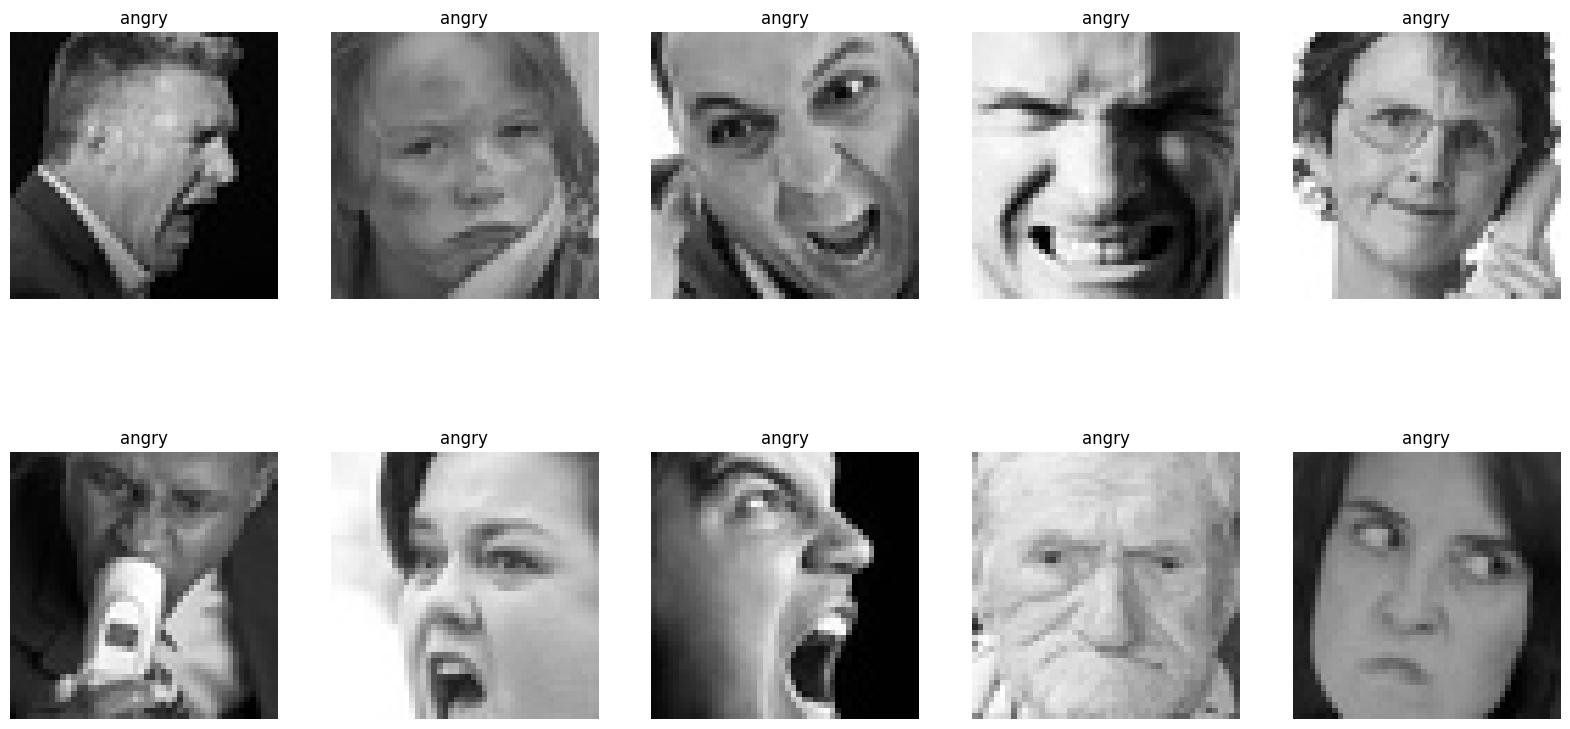

In [14]:
import matplotlib.pyplot as plt
import cv2

# Function to display the first n images from the DataFrame
def display_images(df, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        file_path = df.iloc[i]['file_path']
        label = df.iloc[i]['label']
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.show()

# Display the first 10 images
display_images(train_df, num_images=10)


Here we define a function display_images() to visualize the first n images along with their corresponding labels from a DataFrame containing file paths and labels. It utilizes OpenCV (cv2) to read images and Matplotlib (plt) to display them, ensuring accurate representation of the images in RGB format.

#**Data Augmentation with ImageDataGenerator**




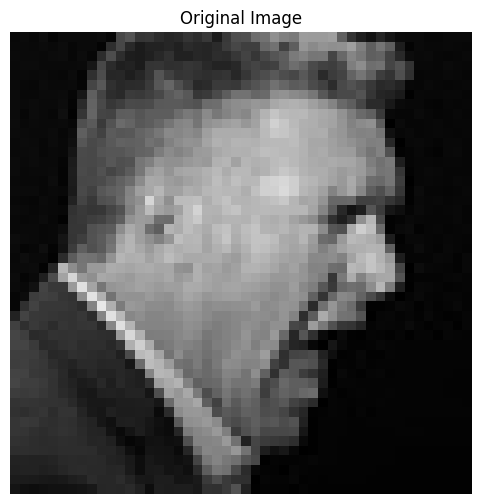

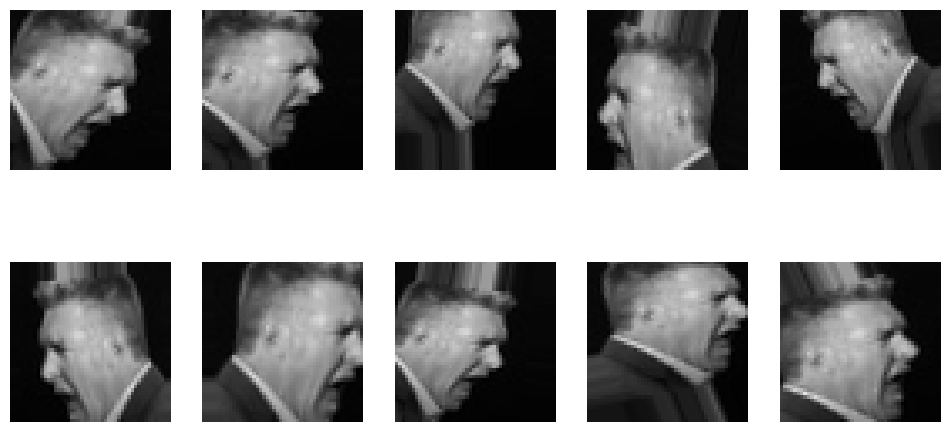

In [15]:

# Example: Define an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Demonstrate preprocessing on a sample image
sample_image_path = train_df.iloc[0]['file_path']
sample_image = cv2.imread(sample_image_path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
sample_image = cv2.resize(sample_image, (48, 48))  # Assuming FER2013 images are 48x48

# Show original image
plt.figure(figsize=(6, 6))
plt.imshow(sample_image)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Show augmented images
sample_image = sample_image.reshape((1, ) + sample_image.shape)  # Reshape for the generator
plt.figure(figsize=(12, 6))
i = 0
for batch in datagen.flow(sample_image, batch_size=1):
    plt.subplot(2, 5, i + 1)
    imgplot = plt.imshow(batch[0])
    plt.axis('off')
    i += 1
    if i % 10 == 0:
        break
plt.show()


This code demonstrates data augmentation using an ImageDataGenerator from the Keras library. The generator is configured with various augmentation parameters such as rotation, width and height shifting, shear, zoom, and horizontal flip.

It then preprocesses a sample image from the dataset, displaying the original image followed by augmented images generated by the ImageDataGenerator. This technique enhances the diversity of the training data, improving the robustness and generalization of the model.


#**Calculating Mean and Standard Deviation of Pixel Values**

In [16]:
import numpy as np

# Example: Calculate mean and standard deviation of pixel values
all_images = []
for file_path in train_df['file_path']:
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48, 48))  # Resize if necessary
    all_images.append(img.flatten())

all_images = np.array(all_images)
mean_pixel_value = np.mean(all_images)
std_pixel_value = np.std(all_images)

print(f"Mean pixel value: {mean_pixel_value}")
print(f"Standard deviation of pixel values: {std_pixel_value}")


Mean pixel value: 129.4733339525739
Standard deviation of pixel values: 65.04478229404025


it calculates the mean and standard deviation of pixel values using NumPy (np), providing insights into the brightness and contrast characteristics of the dataset. These statistics are essential for data normalization and preprocessing steps in machine learning models.

In [17]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate pixel statistics
def calculate_pixel_statistics(df):
    stats = []
    for label in df['label'].unique():
        images = []
        for file_path in df[df['label'] == label]['file_path']:
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            images.append(img.flatten())
        images = np.array(images)
        mean_pixel_value = np.mean(images)
        std_pixel_value = np.std(images)
        stats.append({
            'label': label,
            'mean_pixel_value': mean_pixel_value,
            'std_pixel_value': std_pixel_value
        })
    return pd.DataFrame(stats)

# Calculate pixel statistics
pixel_stats = calculate_pixel_statistics(train_df)
print(pixel_stats)


      label  mean_pixel_value  std_pixel_value
0     angry        126.231322        65.186623
1   disgust        135.226975        63.410874
2      fear        135.518290        64.995502
3     happy        129.434089        63.380463
4   neutral        123.900312        65.300804
5       sad        121.276244        64.869635
6  surprise        146.257382        64.928676


# Plotting pixel statistics

<ipython-input-18-9ed74739a65b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='mean_pixel_value', data=pixel_stats, palette=girlish_palette)
<ipython-input-18-9ed74739a65b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='std_pixel_value', data=pixel_stats, palette=girlish_palette)


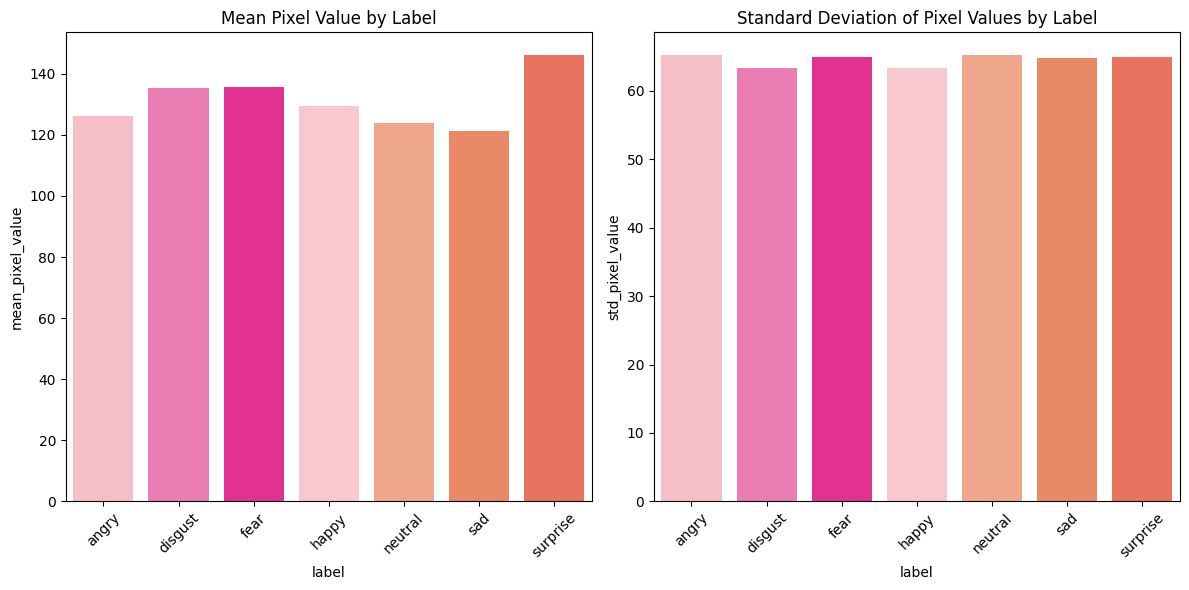

In [18]:

girlish_palette = ['#FFB6C1', '#FF69B4', '#FF1493', '#FFC0CB', '#FFA07A', '#FF7F50', '#FF6347']

# Plotting pixel statistics with girlish colors
plt.figure(figsize=(12, 6))

# Plot mean pixel value
plt.subplot(1, 2, 1)
sns.barplot(x='label', y='mean_pixel_value', data=pixel_stats, palette=girlish_palette)
plt.title('Mean Pixel Value by Label')
plt.xticks(rotation=45)

# Plot standard deviation of pixel values
plt.subplot(1, 2, 2)
sns.barplot(x='label', y='std_pixel_value', data=pixel_stats, palette=girlish_palette)
plt.title('Standard Deviation of Pixel Values by Label')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



#Plotting Histograms of Sample Images

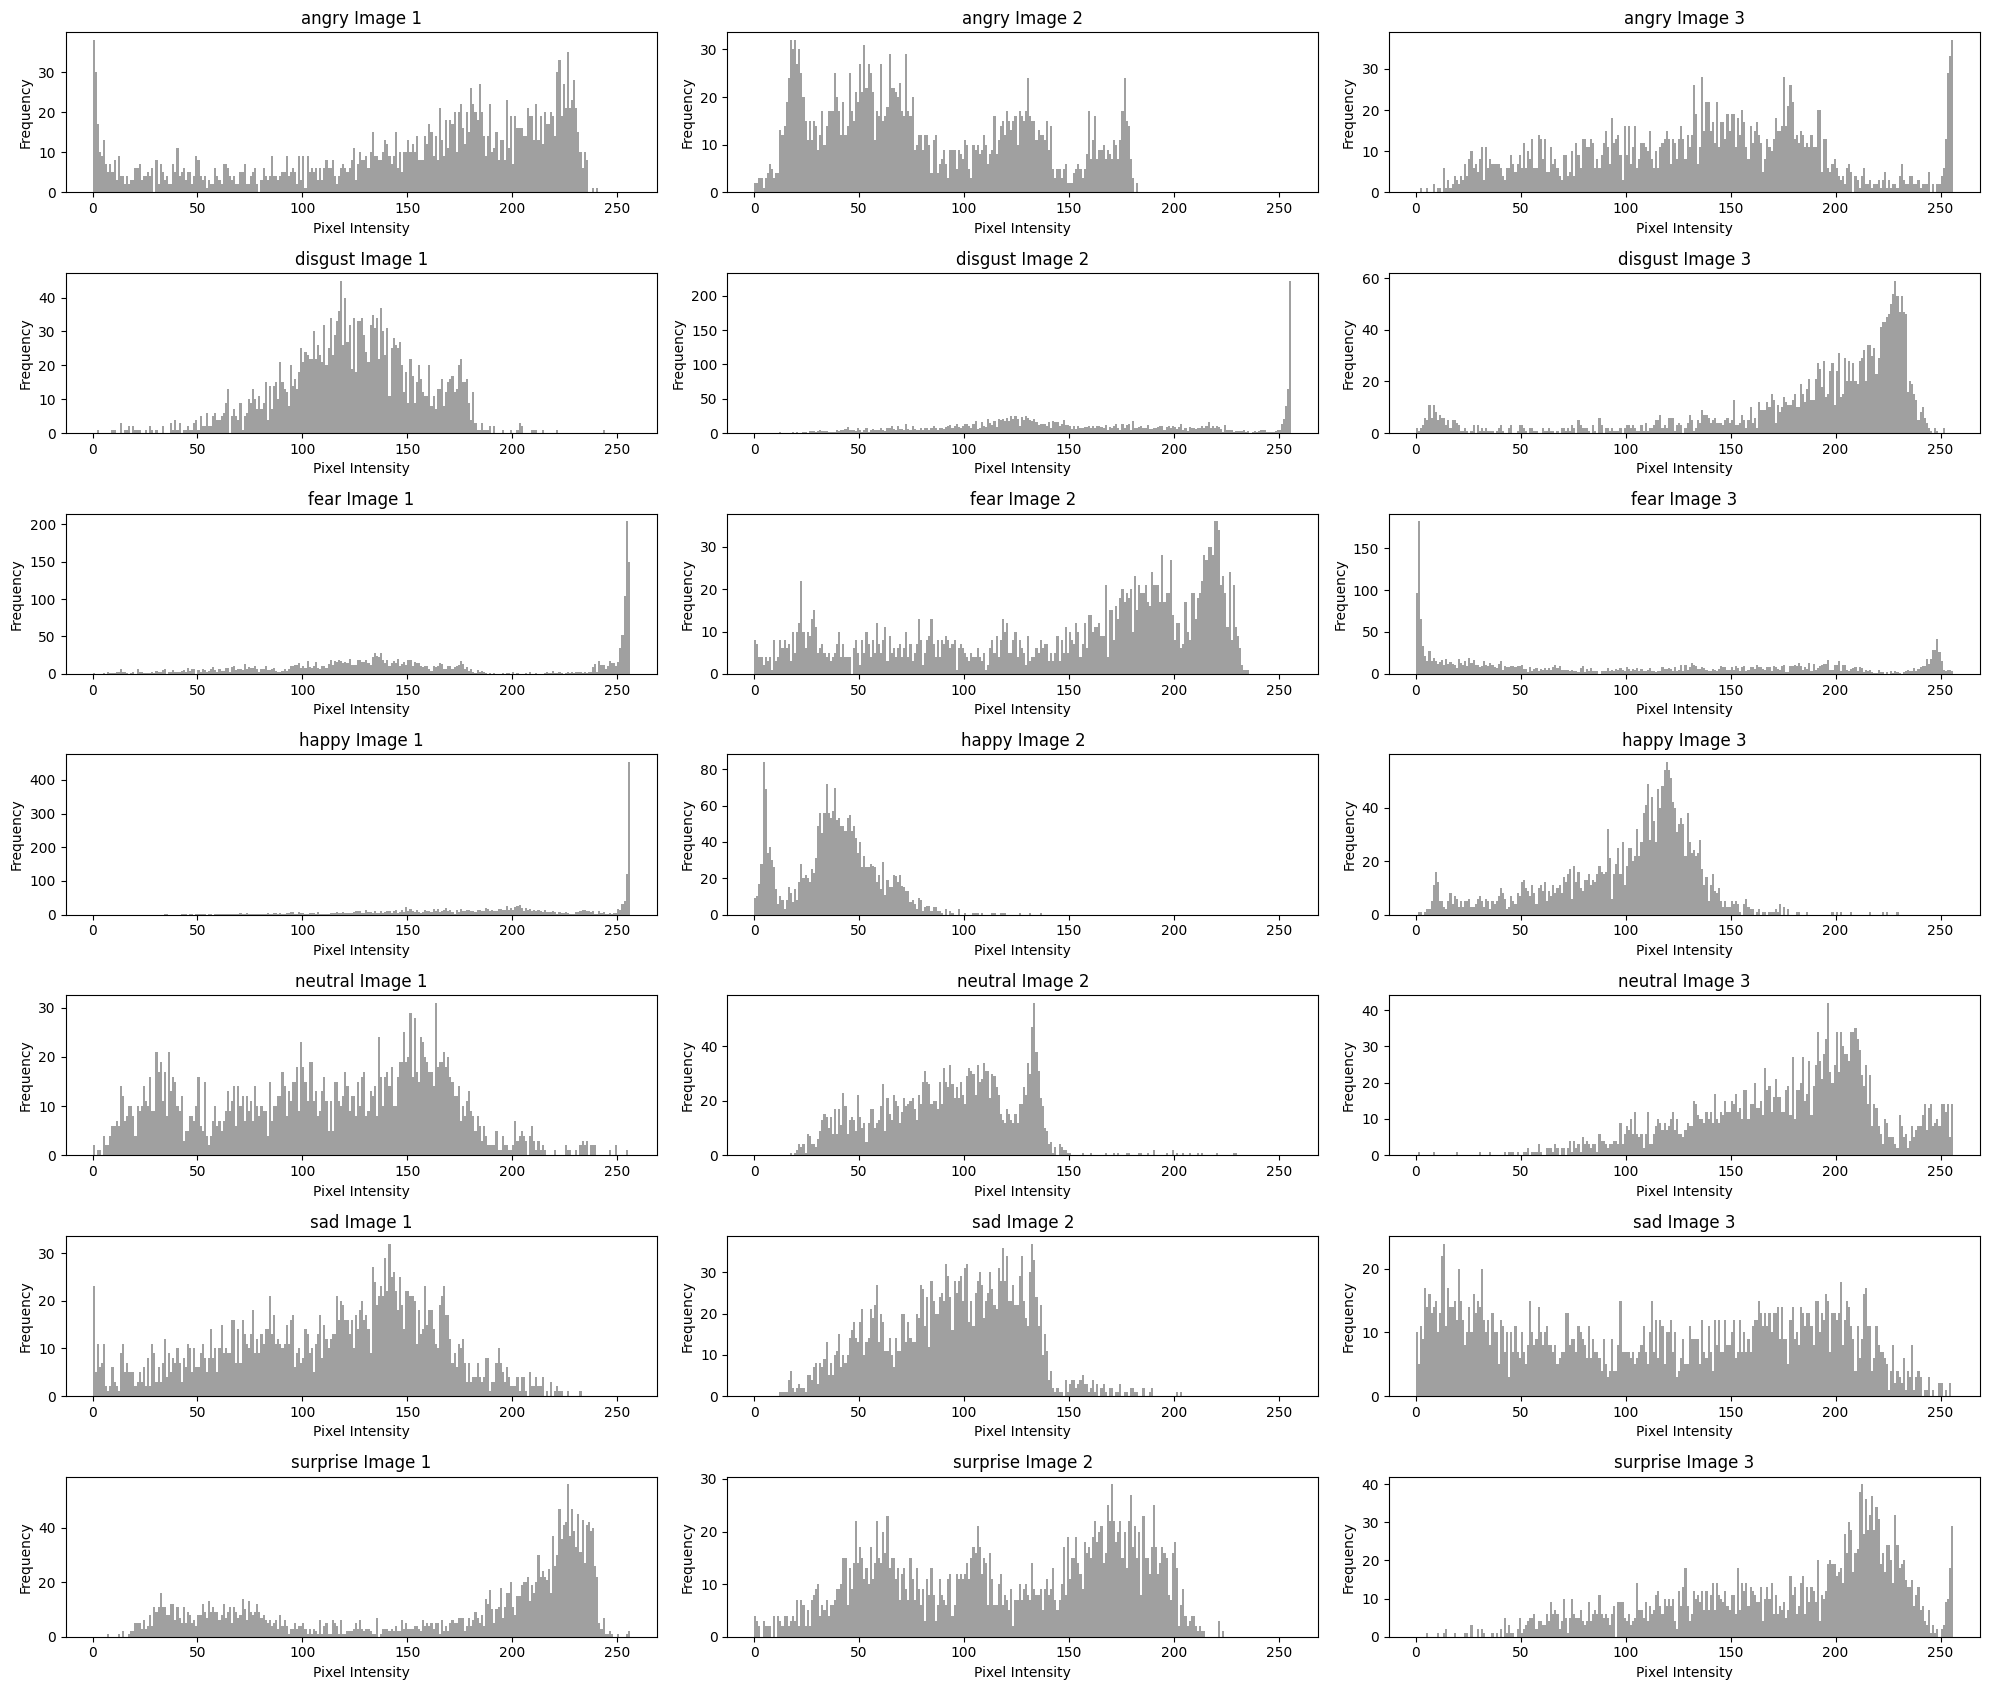

In [19]:
# Function to plot histograms of sample images from each class
def plot_sample_histograms(df, num_samples=3):
    plt.figure(figsize=(20, 17))
    for i, label in enumerate(df['label'].unique()):
        sample_images = df[df['label'] == label].sample(num_samples)
        for j, (index, row) in enumerate(sample_images.iterrows()):
            img = cv2.imread(row['file_path'], cv2.IMREAD_GRAYSCALE)
            plt.subplot(len(df['label'].unique()), num_samples, i*num_samples + j + 1)
            plt.hist(img.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.75)
            plt.title(f'{label} Image {j+1}')
            plt.xlabel('Pixel Intensity')
            plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Plot histograms of sample images
plot_sample_histograms(train_df, num_samples=3)


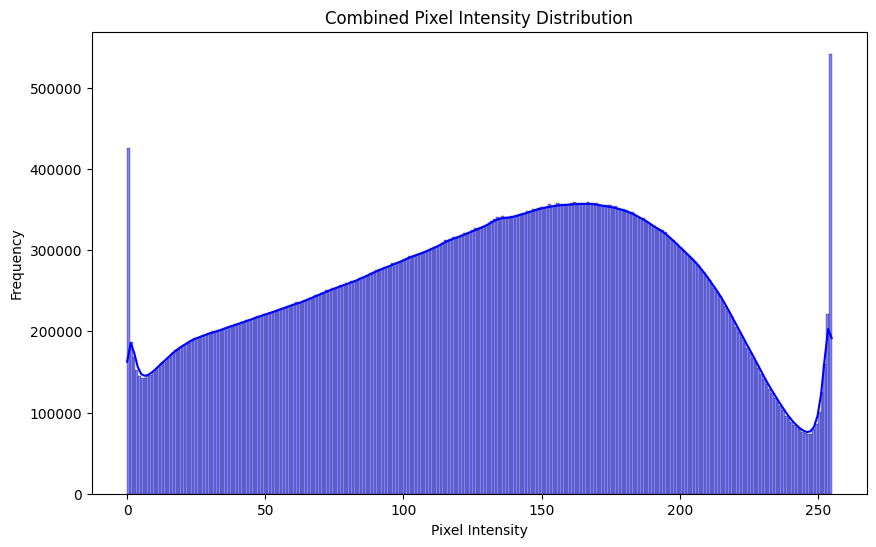

In [20]:
# Function to plot combined histogram for all pixel values in the dataset
def plot_combined_pixel_histogram(df):
    all_images = []
    for file_path in df['file_path']:
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        all_images.append(img.flatten())

    all_images = np.concatenate(all_images)
    plt.figure(figsize=(10, 6))
    sns.histplot(all_images, bins=256, kde=True, color='blue')
    plt.title('Combined Pixel Intensity Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Plot combined histogram of pixel intensities
plot_combined_pixel_histogram(train_df)


#Extracting and Analyzing Pixel Values from Images

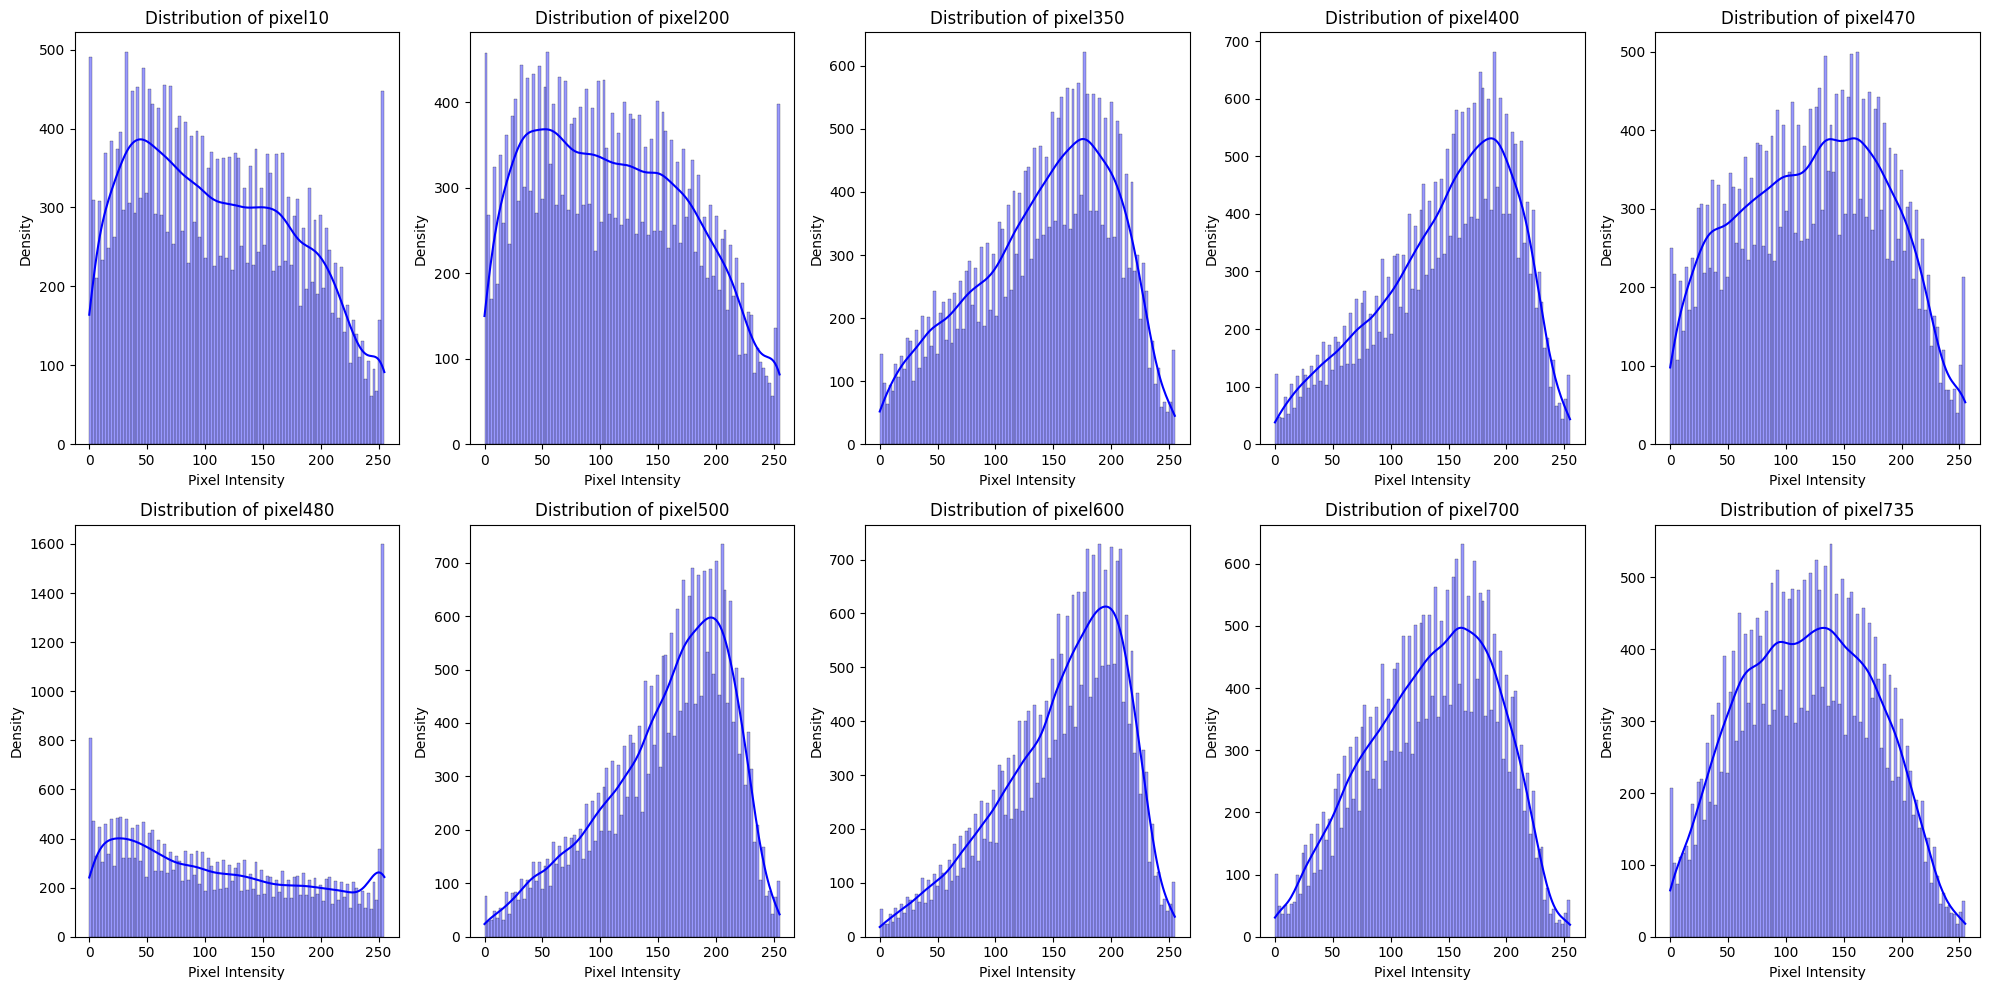

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Function to extract pixel values from specific positions in images
def extract_pixel_values(df, pixel_positions):
    pixel_data = {f'pixel{pos}': [] for pos in pixel_positions}

    for file_path in df['file_path']:
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            flattened_img = img.flatten()
            for pos in pixel_positions:
                if pos < len(flattened_img):
                    pixel_data[f'pixel{pos}'].append(flattened_img[pos])
                else:
                    pixel_data[f'pixel{pos}'].append(np.nan)  # Handle out-of-bound positions

    return pd.DataFrame(pixel_data)

# Define pixel positions to extract
pixel_positions = [10, 200, 350, 400, 470, 480, 500, 600, 700, 735]

# Extract pixel values and create DataFrame
pixel_values_df = extract_pixel_values(train_df, pixel_positions)

# Plot the distribution of specific pixel values
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, pixel in enumerate(pixel_values_df.columns):
    sns.histplot(pixel_values_df[pixel].dropna(), color='blue', bins=100, kde=True, ax=axes[i], alpha=0.4)
    axes[i].set_title(f'Distribution of {pixel}')
    axes[i].set_xlabel('Pixel Intensity')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()


#Displaying sample images from each class

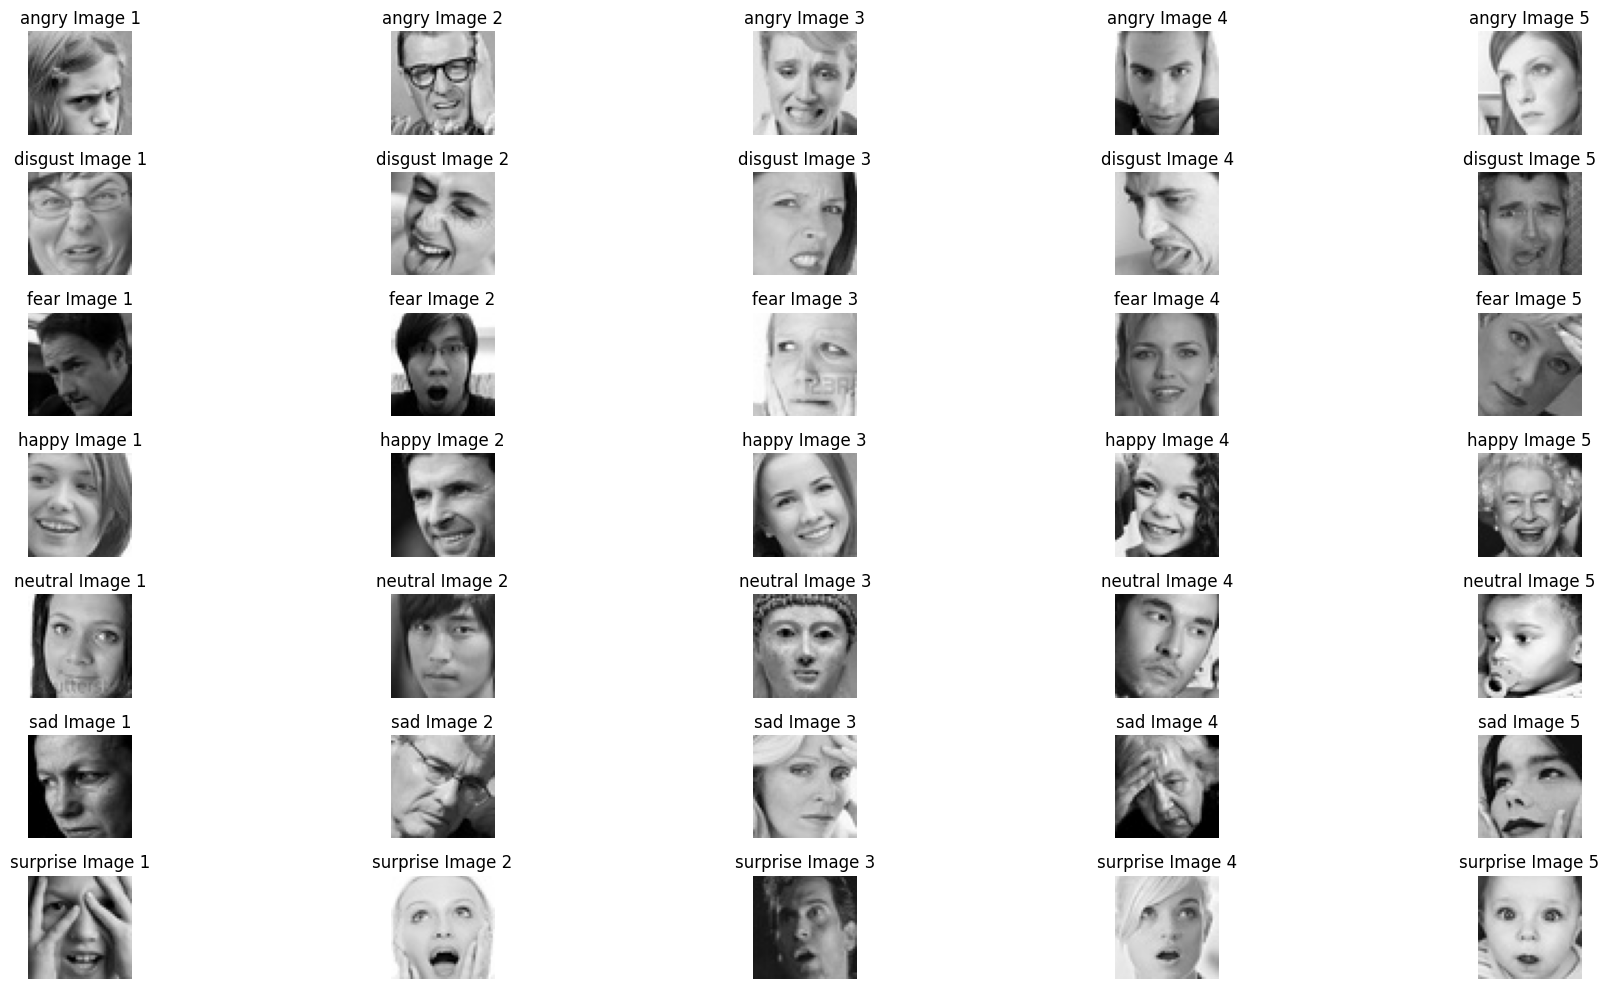

In [21]:
# Function to display sample images from each class
def display_sample_images(df, num_samples=5):
    plt.figure(figsize=(20, 10))
    for i, label in enumerate(df['label'].unique()):
        sample_images = df[df['label'] == label].sample(num_samples)
        for j, (index, row) in enumerate(sample_images.iterrows()):
            img = cv2.imread(row['file_path'])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(len(df['label'].unique()), num_samples, i*num_samples + j + 1)
            plt.imshow(img)
            plt.title(f'{label} Image {j+1}')
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display sample images
display_sample_images(train_df, num_samples=5)


In [ ]:
# Exclude 'file_path' column from the DataFrame
train_df_numeric = train_df.drop(columns=['file_path'])

# Calculate mean images per class
mean_images = train_df_numeric.groupby('label').mean()

# Plot mean images
plt.figure(figsize=(15, 15))
for i in range(len(mean_images)):
    if len(mean_images.iloc[i].values) > 0:  # Check if there are images for this class
        plt.subplot(1, len(mean_images), i + 1)
        plt.imshow(mean_images.iloc[i].values.reshape(48, 48), cmap='gray')  # Assuming images are 48x48 grayscale
        plt.title(f"Class: {mean_images.index[i]}")
        plt.axis('off')
plt.show()


<Figure size 1500x1500 with 0 Axes>

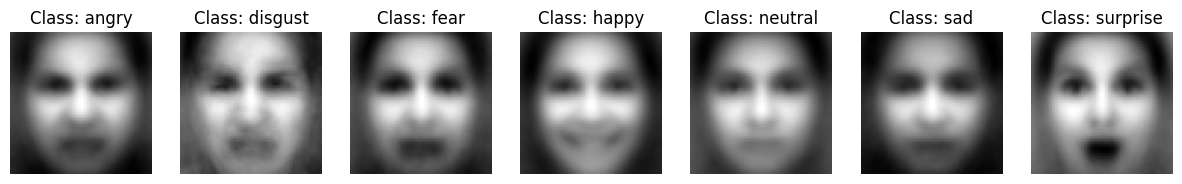

In [22]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# Function to load images and extract pixel values
def extract_pixel_values(df):
    pixel_data = []
    labels = []

    for idx, row in df.iterrows():
        img = cv2.imread(row['file_path'], cv2.IMREAD_GRAYSCALE)
        if img is not None:
            pixel_data.append(img.flatten())
            labels.append(row['label'])

    pixel_df = pd.DataFrame(pixel_data)
    pixel_df['label'] = labels
    return pixel_df

# Extract pixel values and create DataFrame
train_df_numeric = extract_pixel_values(train_df)

# Ensure all pixel values are treated as numeric
for col in train_df_numeric.columns[:-1]:  # Exclude 'label' column
    train_df_numeric[col] = pd.to_numeric(train_df_numeric[col], errors='coerce')

# Calculate mean images per class
mean_images = train_df_numeric.groupby('label').mean()

# Plot mean images
plt.figure(figsize=(15, 15))
for i, (label, mean_image) in enumerate(mean_images.iterrows()):
    plt.subplot(1, len(mean_images), i + 1)
    plt.imshow(mean_image.values.reshape(48, 48), cmap='gray')  # Assuming images are 48x48 grayscale
    plt.title(f"Class: {label}")
    plt.axis('off')
plt.show()


In [23]:
train_df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Columns: 2305 entries, 0 to label
dtypes: object(1), uint8(2304)
memory usage: 63.3+ MB


#Visualize Distribution:
 Visualize the distribution of files using a pie chart or a histogram to gain insights into the data distribution.

In [ ]:
def count_files_in_subdirs(directory, set_name):
    counts = {}
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)
        if os.path.isdir(item_path):
            counts[item] = len(os.listdir(item_path))
    df = pd.DataFrame(counts, index=[set_name])
    return df

# Paths to the training and testing directories.
train_dir = '/content/train'
test_dir = '/content/test'

# Count the files in the subdirectories of the training directory and store the result.
train_count_df = count_files_in_subdirs(train_dir, 'train')

# Count the files in the subdirectories of the testing directory and store the result.
test_count_df = count_files_in_subdirs(test_dir, 'test')

# Now, you can use train_count_df and test_count_df outside the function as needed.
print(train_count_df)

       disgust  fear  angry  surprise  neutral  happy   sad
train      436  4097   3995      3171     4965   7215  4830


# Pie chart for traing subdirectories

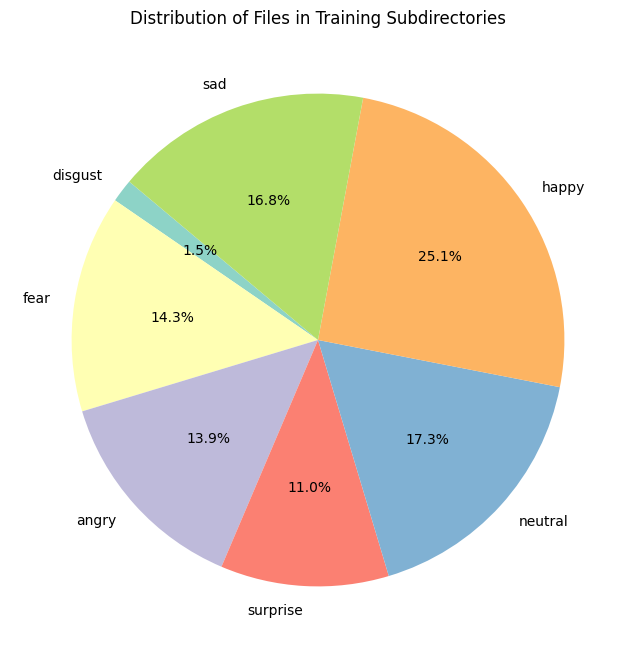

In [ ]:
import seaborn as sns

# Choose a color palette from seaborn
colors = sns.color_palette('Set3')

plt.figure(figsize=(8, 8))
plt.pie(train_count_df.values.flatten(), labels=train_count_df.columns, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Files in Training Subdirectories')
plt.show()





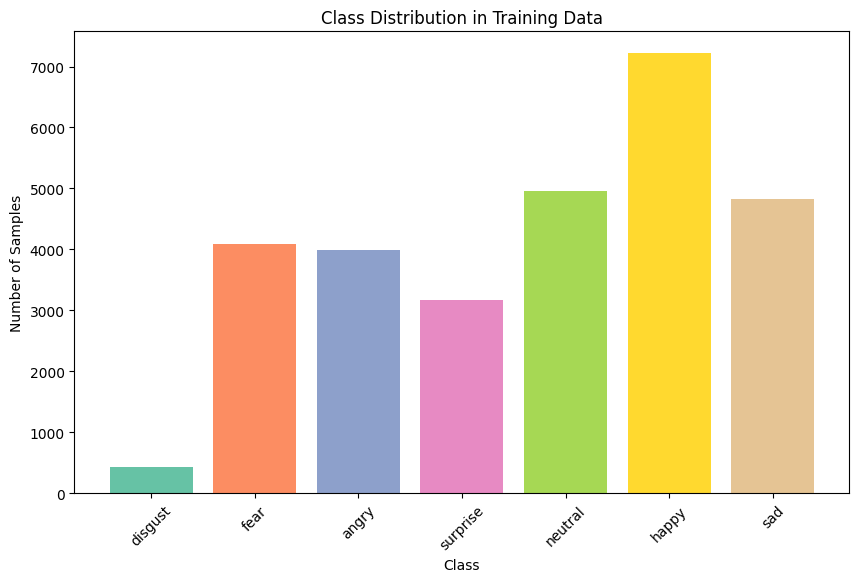

In [ ]:
import seaborn as sns

# Choose a color palette from seaborn
colors = sns.color_palette('Set2')

plt.figure(figsize=(10, 6))
plt.bar(train_count_df.columns, train_count_df.values.flatten(), color=colors)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()



In [ ]:
def count_files_in_subdirs(directory, set_name):
    counts = {}
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)
        if os.path.isdir(item_path):
            counts[item] = len(os.listdir(item_path))
    df = pd.DataFrame(counts, index=[set_name])
    return df

# Paths to the training and testing directories.
train_dir = '/content/train'
test_dir = '/content/test'

# Count the files in the subdirectories of the training directory and store the result.
train_count_df = count_files_in_subdirs(train_dir, 'train')

# Count the files in the subdirectories of the testing directory and store the result.
test_count_df = count_files_in_subdirs(test_dir, 'test')

# Now, you can use train_count_df and test_count_df outside the function as needed.
print(train_count_df)
print(test_count_df)

       disgust  fear  angry  surprise  neutral  happy   sad
train      436  4097   3995      3171     4965   7215  4830
      disgust  fear  angry  surprise  neutral  happy   sad
test      111  1024    958       831     1233   1774  1247


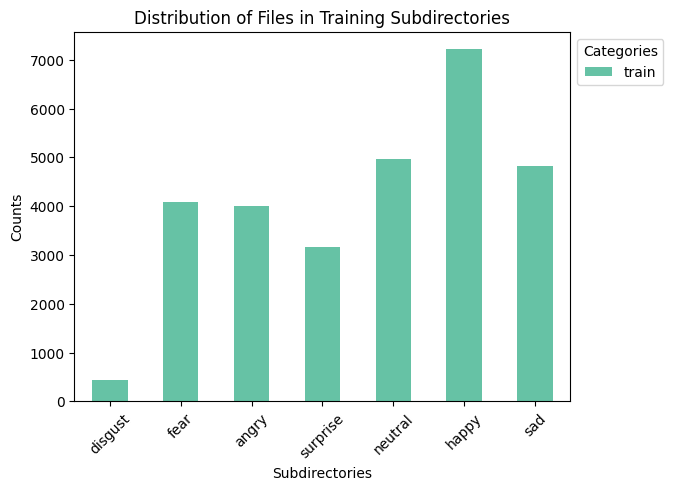

In [ ]:
import seaborn as sns

# Assuming train_count_df is your DataFrame containing counts

# Choose a color palette from seaborn
colors = sns.color_palette('Set2')

# Transpose the DataFrame and plot
train_count_df.transpose().plot(kind='bar', color=colors)

# Display the plot
plt.title('Distribution of Files in Training Subdirectories')
plt.xlabel('Subdirectories')
plt.ylabel('Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Categories', bbox_to_anchor=(1, 1))
plt.show()


# Pie chart for testing subdirectories

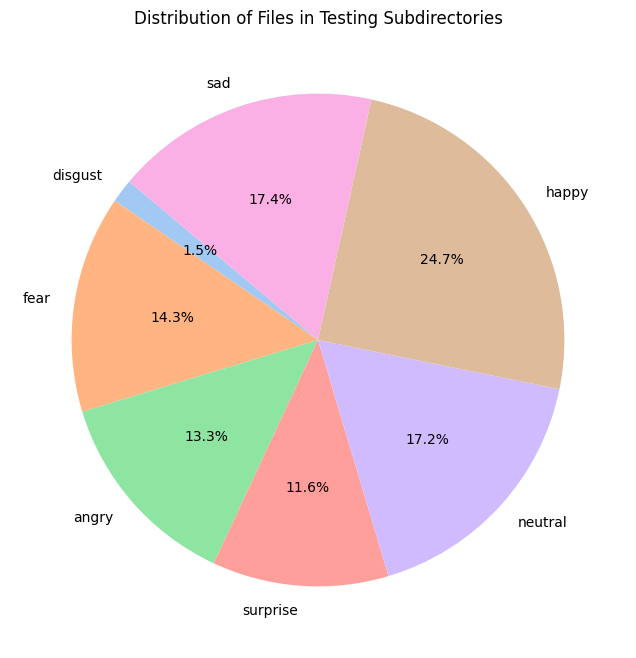

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming test_count_df is your DataFrame containing counts

# Choose a color palette from seaborn
colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 8))
plt.pie(test_count_df.values.flatten(), labels=test_count_df.columns, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Files in Testing Subdirectories')
plt.show()



In [ ]:
import os
from PIL import Image

# Assuming test_dir is the directory containing the test images
test_dir = '/content/test'

# Iterate over each file in the test directory
for subdir, _, files in os.walk(test_dir):
    for file_name in files:
        # Construct the full file path
        file_path = os.path.join(subdir, file_name)
        # Load the image using PIL
        img = Image.open(file_path)
        # Get the dimensions of the image
        width, height = img.size
        # Print the dimensions
        print(f"Image at {file_path}: Width={width}, Height={height}")



Streaming output truncated to the last 5000 lines.
Image at /content/test/surprise/PrivateTest_52382443.jpg: Width=48, Height=48
Image at /content/test/surprise/PublicTest_23695727.jpg: Width=48, Height=48
Image at /content/test/surprise/PublicTest_80352203.jpg: Width=48, Height=48
Image at /content/test/surprise/PublicTest_68423633.jpg: Width=48, Height=48
Image at /content/test/surprise/PublicTest_42864737.jpg: Width=48, Height=48
Image at /content/test/surprise/PrivateTest_9068096.jpg: Width=48, Height=48
Image at /content/test/surprise/PrivateTest_59347947.jpg: Width=48, Height=48
Image at /content/test/surprise/PrivateTest_83796714.jpg: Width=48, Height=48
Image at /content/test/surprise/PrivateTest_41853394.jpg: Width=48, Height=48
Image at /content/test/surprise/PrivateTest_32430628.jpg: Width=48, Height=48
Image at /content/test/surprise/PrivateTest_97342741.jpg: Width=48, Height=48
Image at /content/test/surprise/PublicTest_17194400.jpg: Width=48, Height=48
Image at /content/t

#Width and height distribution of images

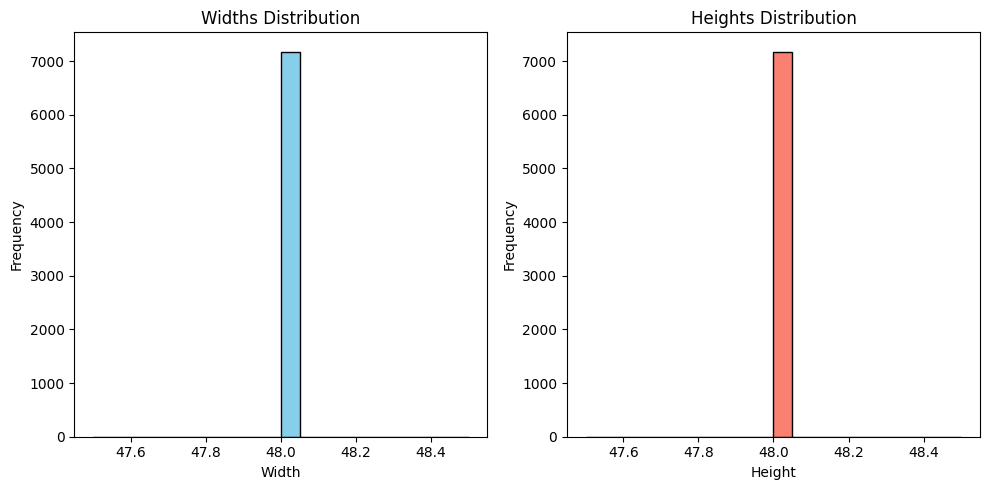

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Assuming test_dir is the directory containing the test images
test_dir = '/content/test'

# Lists to store image dimensions
widths = []
heights = []

# Iterate over each file in the test directory
for subdir, _, files in os.walk(test_dir):
    for file_name in files:
        # Construct the full file path
        file_path = os.path.join(subdir, file_name)
        # Load the image using PIL
        img = Image.open(file_path)
        # Get the dimensions of the image
        width, height = img.size
        # Append dimensions to lists
        widths.append(width)
        heights.append(height)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='skyblue', edgecolor='black')
plt.title('Widths Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='salmon', edgecolor='black')
plt.title('Heights Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



#scatter plot of Test Subdirectories

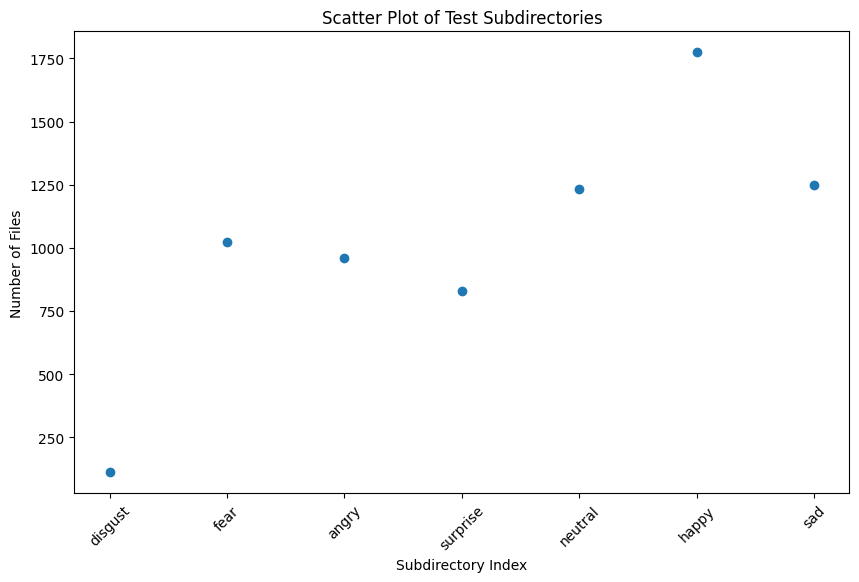

In [ ]:


# Assuming test_count_df is the DataFrame containing counts of files in test subdirectories
# Assign numerical values to each subdirectory
subdirectories = test_count_df.columns
subdirectory_indices = range(len(subdirectories))

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(subdirectory_indices, test_count_df.values.flatten())
plt.title('Scatter Plot of Test Subdirectories')
plt.xlabel('Subdirectory Index')
plt.ylabel('Number of Files')
plt.xticks(subdirectory_indices, subdirectories, rotation=45)
plt.show()


#Box plot of Test Subdirectories

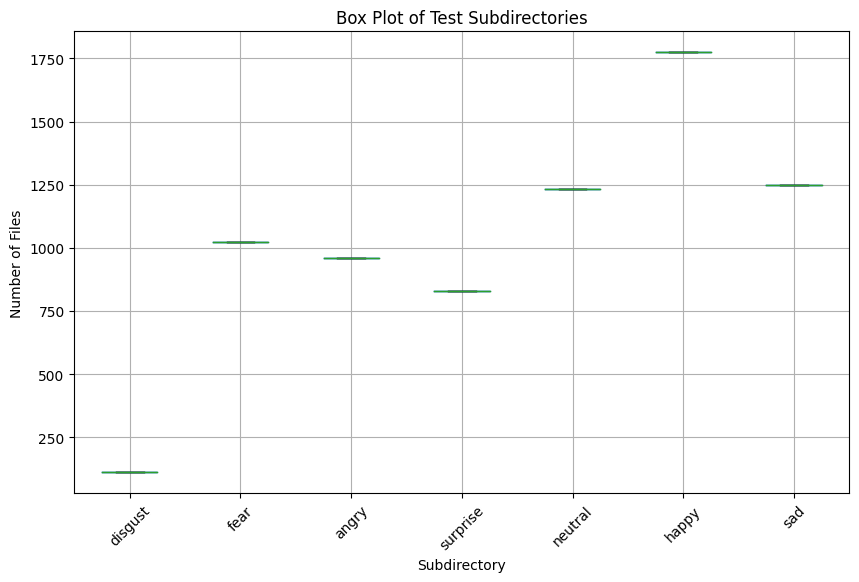

In [ ]:
import matplotlib.pyplot as plt

# Assuming test_count_df is the DataFrame containing counts of files in test subdirectories
plt.figure(figsize=(10, 6))
test_count_df.boxplot()
plt.title('Box Plot of Test Subdirectories')
plt.xlabel('Subdirectory')
plt.ylabel('Number of Files')
plt.xticks(rotation=45)
plt.show()


#Raddar chart of Test Subdirectories

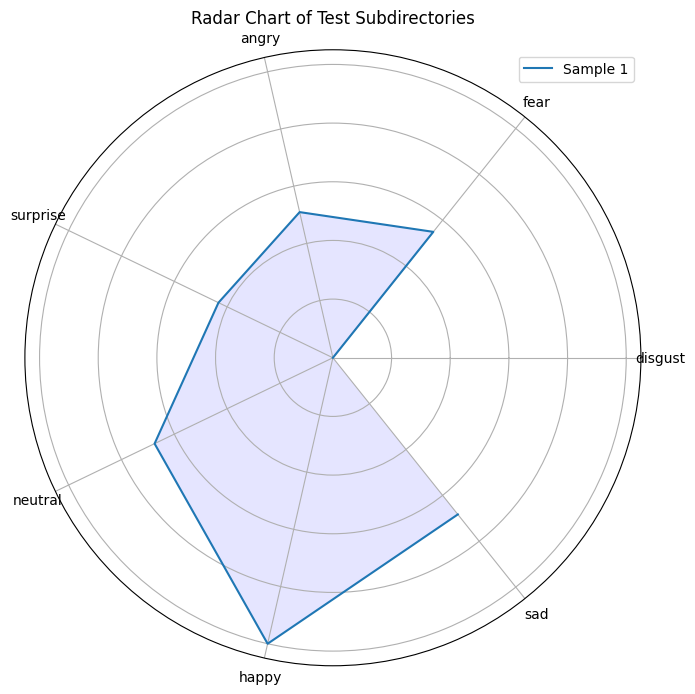

In [ ]:

# Assuming test_count_df is the DataFrame containing counts of files in test subdirectories
# Define the categories (subdirectories)
categories = test_count_df.columns
num_categories = len(categories)

# Create a function to normalize the data to be between [0, 1]
def normalize_data(data):
    normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))
    return normalized_data

# Normalize the data in test_count_df
normalized_data = normalize_data(test_count_df.values.flatten())

# Reshape the normalized data into a format suitable for plotting
radar_data = np.reshape(normalized_data, (num_categories, -1))

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i in range(radar_data.shape[1]):
    ax.plot(angles, radar_data[:, i], label=f'Sample {i+1}')

# Fill area under lines
ax.fill(angles, radar_data.mean(axis=1), 'b', alpha=0.1)

# Add labels, title, and legend
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(categories)
plt.title('Radar Chart of Test Subdirectories')
plt.legend()
plt.show()


**Pixel Intensity Distribution**: Plot histograms of pixel intensities to visualize their distribution. This helps in understanding the range of intensities present in the images and can be useful for thresholding or image enhancement techniques.

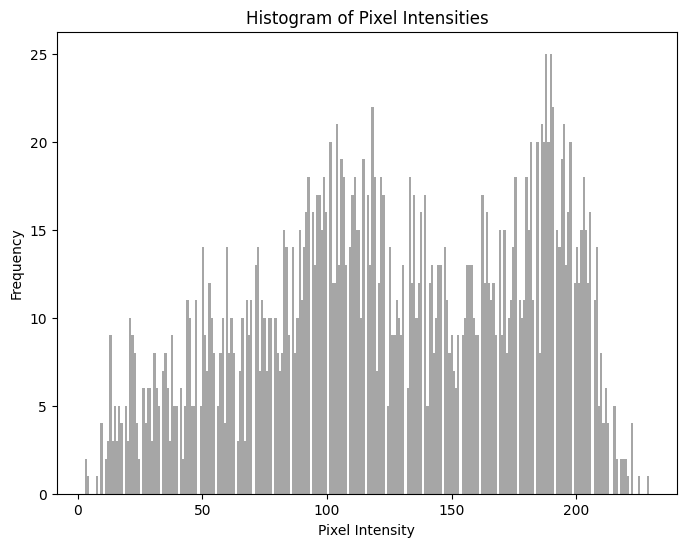

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
img = cv2.imread('/content/test/angry/PrivateTest_10131363.jpg', cv2.IMREAD_GRAYSCALE)

# Flatten the 2D array of pixel intensities into a 1D array
pixel_values = img.flatten()

# Plot the histogram of pixel intensities
plt.figure(figsize=(8, 6))
plt.hist(pixel_values, bins=256, color='gray', alpha=0.7)
plt.title('Histogram of Pixel Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()



**Image Comparison**

We load seven different images with different emotions and convert them to grayscale.
We resize the images to have the same dimensions for comparison.
We display the original images.
We compute the differences between consecutive images using the absolute difference method.
We display the differences between consecutive images.




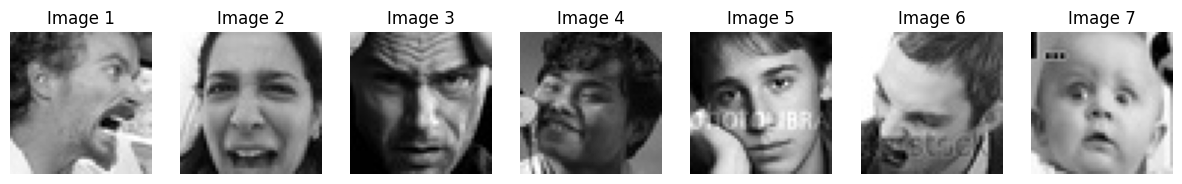

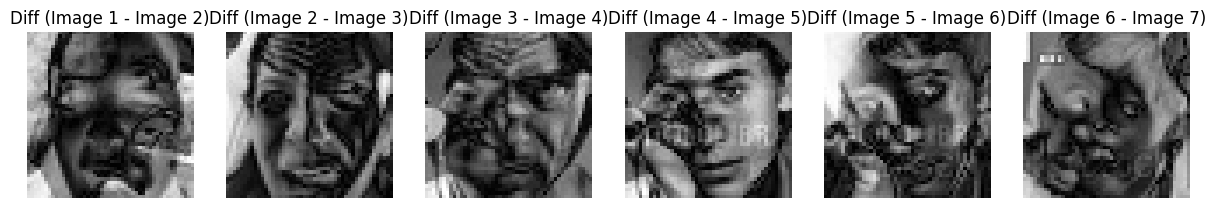

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load seven different images with different emotions
image_paths = [
    "/content/test/angry/PrivateTest_10304478.jpg",
    "/content/test/disgust/PrivateTest_19671520.jpg",
    "/content/test/fear/PrivateTest_10254684.jpg",
    "/content/test/happy/PrivateTest_10470092.jpg",
    "/content/test/neutral/PrivateTest_10767287.jpg",
    "/content/test/angry/PrivateTest_10590091.jpg",
    "/content/test/surprise/PrivateTest_10089743.jpg"
]

# Read images and convert them to grayscale
images_gray = [cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY) for image_path in image_paths]

# Resize images to the same dimensions for comparison
min_height = min(img.shape[0] for img in images_gray)
min_width = min(img.shape[1] for img in images_gray)
images_resized = [cv2.resize(img, (min_width, min_height)) for img in images_gray]

# Function to display images
def display_images(images, titles):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for ax, image, title in zip(axes, images, titles):
        ax.imshow(image, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.show()

# Display original images
display_images(images_resized, ['Image 1', 'Image 2', 'Image 3', 'Image 4', 'Image 5', 'Image 6', 'Image 7'])

# Function to compute image difference
def image_difference(img1, img2):
    return cv2.absdiff(img1, img2)

# Compute differences between images
image_pairs = [(images_resized[i], images_resized[i+1]) for i in range(len(images_resized) - 1)]
image_diffs = [image_difference(pair[0], pair[1]) for pair in image_pairs]

# Display image differences
display_images(image_diffs, ['Diff (Image 1 - Image 2)', 'Diff (Image 2 - Image 3)', 'Diff (Image 3 - Image 4)',
                             'Diff (Image 4 - Image 5)', 'Diff (Image 5 - Image 6)', 'Diff (Image 6 - Image 7)'])


**Compare Training and Testing Distributions**: Visualize and compare the distribution of files in training and testing subdirectories to see if there are any significant differences.

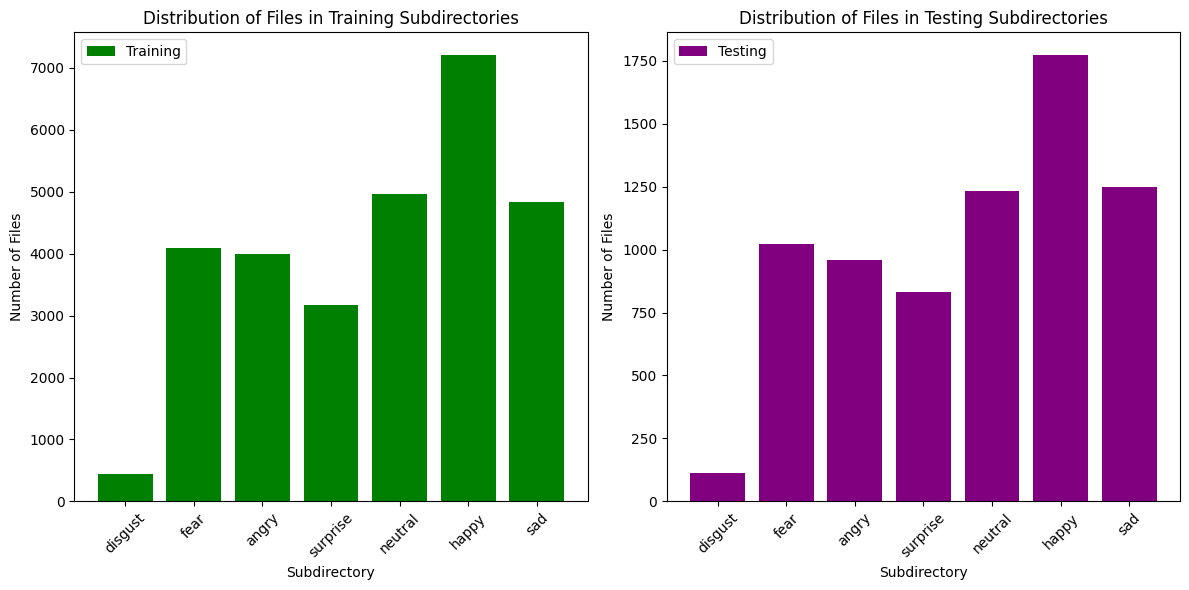

In [ ]:
# Plot the distribution of files in training and testing subdirectories side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(train_count_df.columns, train_count_df.values.flatten(), color='green', label='Training')  # Change color to green
plt.title('Distribution of Files in Training Subdirectories')
plt.xlabel('Subdirectory')
plt.ylabel('Number of Files')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(test_count_df.columns, test_count_df.values.flatten(), color='purple', label='Testing')  # Change color to purple
plt.title('Distribution of Files in Testing Subdirectories')
plt.xlabel('Subdirectory')
plt.ylabel('Number of Files')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


**Calculate Total Files**: Calculate and compare the total number of files in the training and testing directories.

In [ ]:
total_files_train = train_count_df.sum(axis=1).values[0]
total_files_test = test_count_df.sum(axis=1).values[0]

print("Total files in training directory:", total_files_train)
print("Total files in testing directory:", total_files_test)


Total files in training directory: 28709
Total files in testing directory: 7178


# **Edge Detection**
 **Sobel Edge Detection:**

Sobel operator computes the gradient magnitude of an image by convolving it with Sobel kernels in both the x and y directions.
It highlights edges by emphasizing areas of high intensity change, making it suitable for detecting edges with various orientations.

**Canny Edge Detection:**

Canny edge detection algorithm involves multiple steps, including Gaussian blurring, gradient calculation, non-maximum suppression, and hysteresis thresholding.
It effectively detects edges while minimizing false positives by selecting only the local maxima in the gradient magnitude.

**Laplacian Edge Detection:**
Laplacian operator computes the second derivative of the image intensity function to highlight regions of rapid intensity change.
It may produce thicker edges compared to other algorithms and is sensitive to noise, but it can effectively detect edges with strong intensity changes.

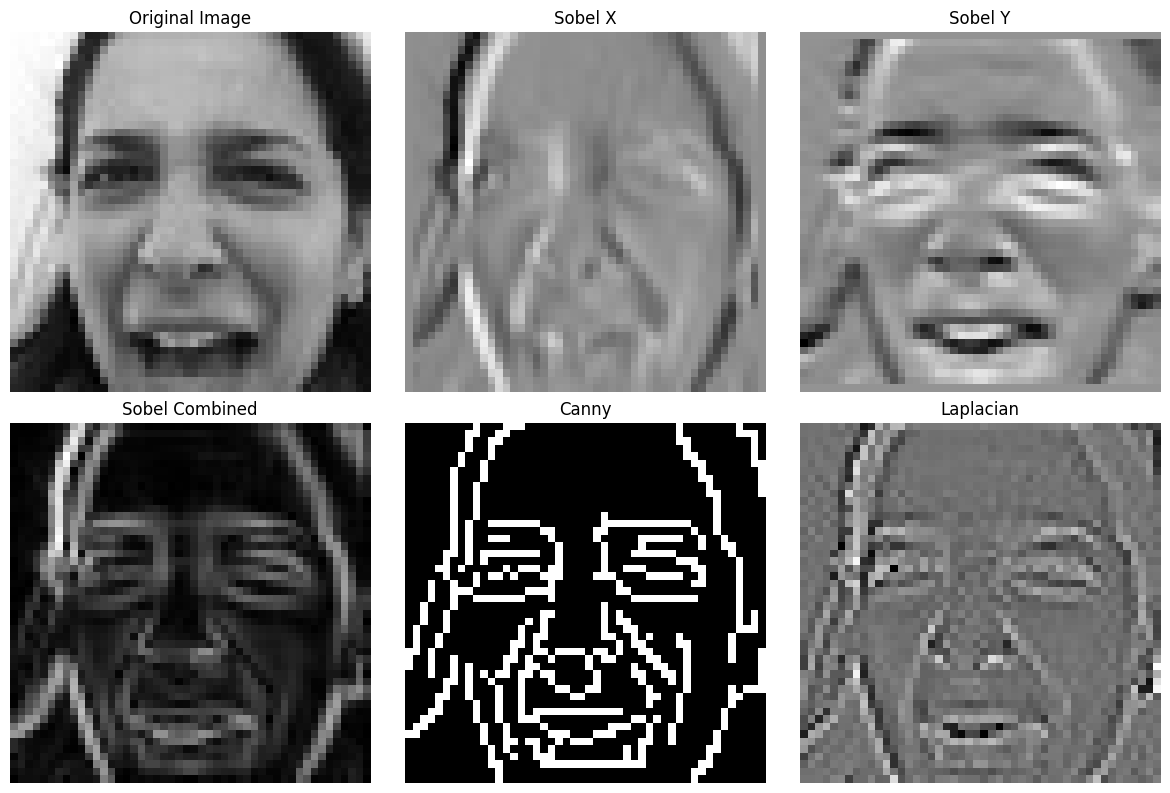

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = "/content/test/disgust/PrivateTest_19671520.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Sobel edge detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(sobel_x**2 + sobel_y**2)

# Apply Canny edge detection
canny = cv2.Canny(image, 100, 200)

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Plot the original image and detected edges
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(sobel, cmap='gray')
plt.title('Sobel Combined')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(canny, cmap='gray')
plt.title('Canny')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis('off')

plt.tight_layout()
plt.show()


# Plotting one image from each emotion.

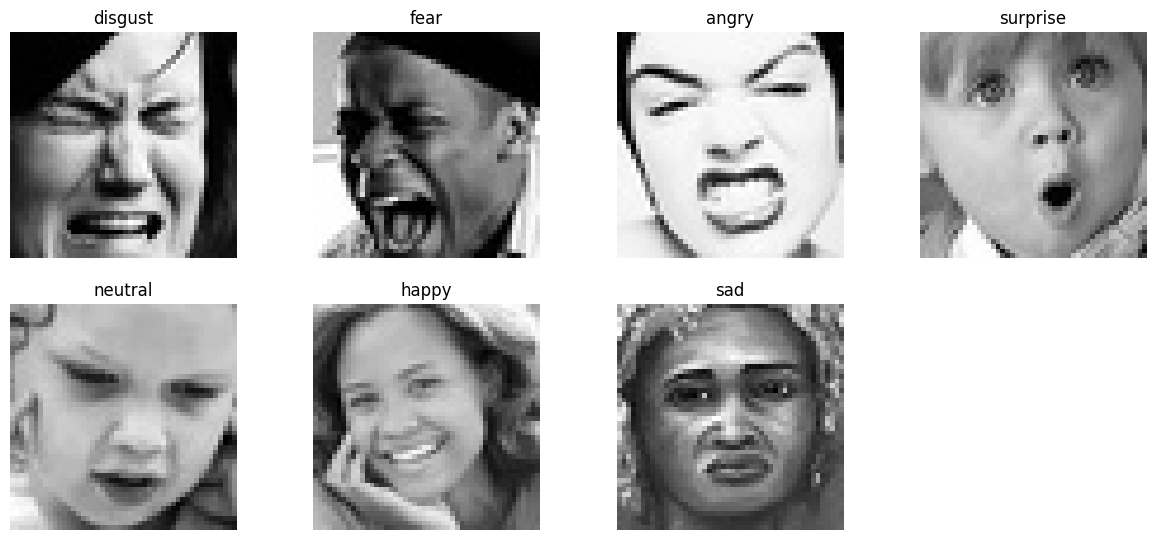

In [ ]:
emotions = os.listdir(train_dir)
plt.figure(figsize=(15,10))

for i, emotion in enumerate(emotions, 1):
    folder = os.path.join(train_dir, emotion)
    img_path = os.path.join(folder, os.listdir(folder)[42])
    img = plt.imread(img_path)
    plt.subplot(3, 4, i)
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')

# Plotting random images from given directory

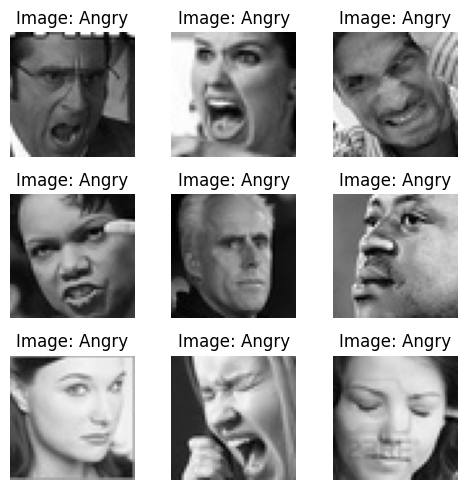

In [ ]:
# Placeholder for the directory path
angry_directory_path = '/content/train/angry'
plot_images_from_directory(angry_directory_path, class_name = 'Angry')

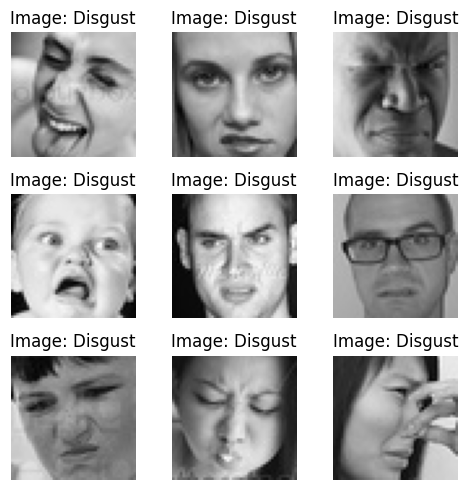

In [ ]:
# Placeholder for the directory path
disgust_directory_path = '/content/train/disgust'  # Replace with your directory path
plot_images_from_directory(disgust_directory_path, class_name = 'Disgust')

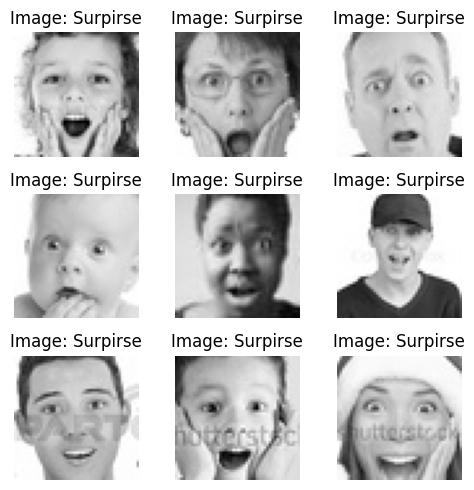

In [ ]:
# Placeholder for the directory path
surpirse_directory_path = '/content/train/surprise'  # Replace with your directory path
plot_images_from_directory(surpirse_directory_path, class_name = 'Surpirse')

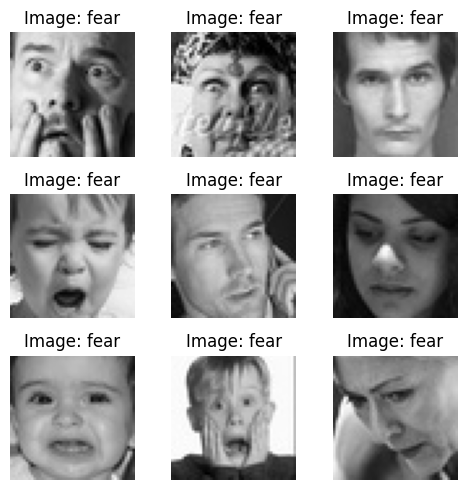

In [ ]:
fear_directory_path = '/content/train/fear'  # Replace with your directory path
plot_images_from_directory(fear_directory_path, class_name = 'fear')

# Checking shapes and channels.

In [ ]:
image = '/content/train/angry/Training_10118481.jpg'

import cv2

img = cv2.imread(image) # Default load in color format.

# If the image is loaded successfully, print its pixel values
if img is not None:
    # print(img)
    print("Shape:", img.shape)
else:
    print("The image could not be loaded. Please check the path and file permissions.")

Shape: (48, 48, 3)


In [ ]:
import cv2

image_path = '/content/train/angry/Training_10118481.jpg'

# Load the image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# If the image is loaded successfully, print its pixel values
if img is not None:
    # print(img)
    print("Shape:", img.shape)  # This should now print (48, 48)
else:
    print("The image could not be loaded. Please check the path and file permissions.")

Shape: (48, 48)


#PCA

#for single image

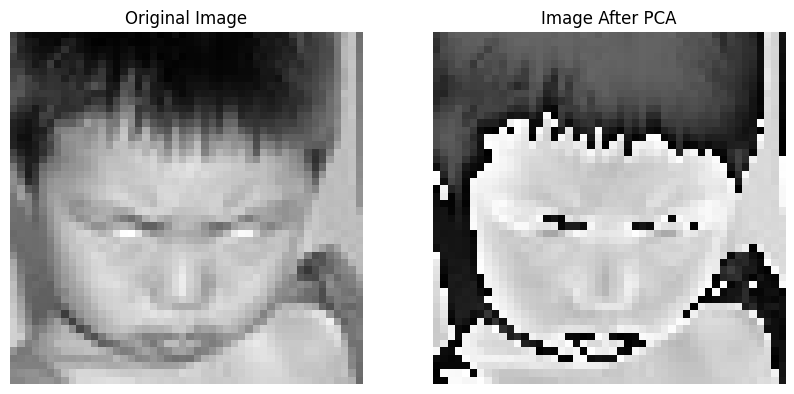

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.decomposition import PCA

# Load the image
image = cv2.imread('/content/train/angry/Training_10118481.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Reshape the image into a 2D array
image_array = gray_image.reshape(-1, 1)

# Perform PCA on the image array
pca = PCA(n_components=1)
pca.fit(image_array)

# Transform the image array using the PCA model
transformed_image_array = pca.transform(image_array)

# Reshape the transformed image array back into a 2D array
transformed_image = transformed_image_array.reshape(gray_image.shape)

# Convert the transformed image back to uint8
transformed_image = np.uint8(transformed_image)

# Display the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Image After PCA')
plt.axis('off')

plt.show()


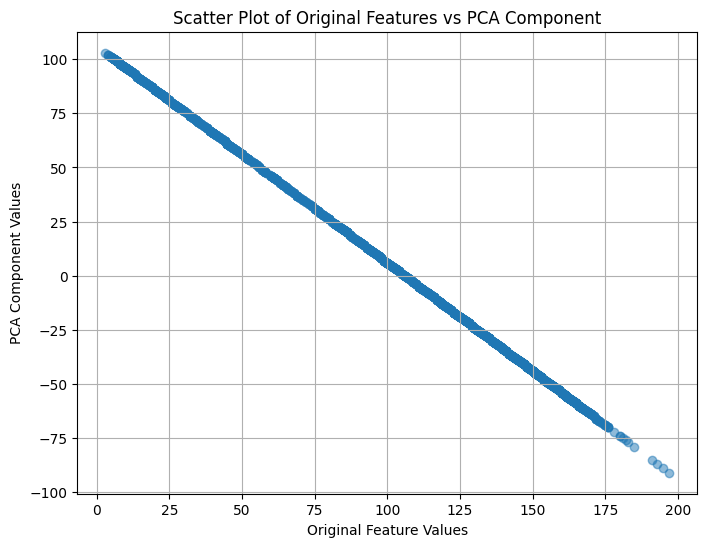

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(image_array, transformed_image_array, alpha=0.5)
plt.xlabel('Original Feature Values')
plt.ylabel('PCA Component Values')
plt.title('Scatter Plot of Original Features vs PCA Component')
plt.grid(True)
plt.show()

#Image Augmentation

In [ ]:
# Define paths to the train and validation directories
train_data_dir = '/content/train'
test_data_dir = '/content/test'
# validation_data_dir = '/content/emotion_detection_project/datasets/raw/test'

# Set some parameters
img_width, img_height = 48, 48  # Size of images
batch_size = 64
epochs = 10
num_classes = 7  # Update this based on the number of your classes


# Initializing the ImageDataGenerator with data augmentation options for the training set
data_generator = ImageDataGenerator(
    rescale=1./255,  # Rescale the pixel values from [0, 255] to [0, 1]
    rotation_range=40,  # Degree range for random rotations
    width_shift_range=0.2,  # Range (as a fraction of total width) for random horizontal shifts
    height_shift_range=0.2,  # Range (as a fraction of total height) for random vertical shifts
    shear_range=0.2,  # Shearing intensity (shear angle in counter-clockwise direction)
    zoom_range=0.2,  # Range for random zoom
    horizontal_flip=True,  # Randomly flip inputs horizontally
    fill_mode='nearest',  # Strategy to fill newly created pixels, which can appear after a rotation or a width/height shift
    validation_split=0.2  # Set the validation split; 20% of the data will be used for validation
)

test_data_generator = ImageDataGenerator(rescale=1./255)


# Automatically retrieve images and their classes for train and validation sets
train_generator = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training')

validation_generator = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation')

test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
    )

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


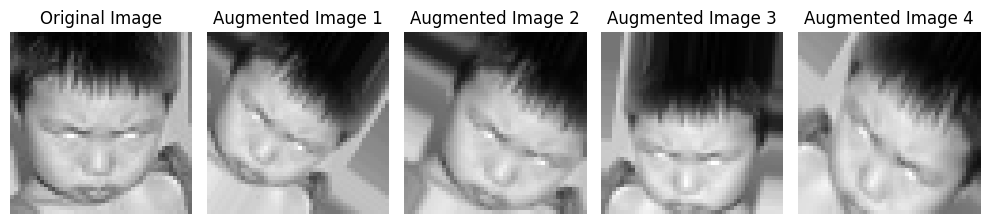

In [ ]:
# Path to your specific image
image_path = '/content/train/angry/Training_10118481.jpg'

# Load and convert the image to an array
img = load_img(image_path, color_mode='grayscale', target_size=(img_width, img_height))  # Adjust color_mode if necessary
img_array = img_to_array(img)  # Converts the image to a numpy array
img_array = img_array.reshape((1,) + img_array.shape)  # Reshapes the image to (1, width, height, channels) for the generator

# Setting up the plot
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))
# Plot the original image first. Since img_array is a 3D array after reshaping, we use [:, :, 0]
axes[0].imshow(img_array[0, :, :, 0], cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Generate and plot augmented images
for i, ax in enumerate(axes.flat[1:]):  # Start from the second subplot
    # Generate a batch of augmented images
    aug_iter = data_generator.flow(img_array, batch_size=1)
    aug_img = next(aug_iter)[0]  # Get the first augmented image from the batch

    # Plot the augmented image. We directly use [:, :, 0] without an initial batch index
    ax.imshow(aug_img[:, :, 0], cmap='gray')
    ax.set_title(f'Augmented Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

# CNN Model

In [ ]:
# Assuming img_width, img_height, and classes are defined. For example:
img_width, img_height = 48, 48
classes = 7

#Initialising the CNN
model = tf.keras.models.Sequential()

# Adding convolutional layers with activations on separate lines
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(img_width, img_height, 1)))
model.add(tf.keras.layers.Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Activation('relu'))
model.add(Conv2D(256, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Activation('relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening and adding dense layers
model.add(Flatten())
model.add(Dense(1024))
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(classes))
model.add(tf.keras.layers.Activation('softmax'))

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# File path for the model checkpoint
cnn_path = '/content/FER_2013_Emotion_Detection/Custom_CNN_With_Augmentation'
name = 'Custom_CNN_augmented_model.keras'
chk_path = os.path.join(cnn_path, name)

# Callback to save the model checkpoint
checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             monitor='val_loss')

# Callback for early stopping
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001)

# Callback to log training data to a CSV file
csv_logger = CSVLogger(os.path.join(cnn_path,'training.log'))

# Aggregating all callbacks into a list
callbacks = [checkpoint, earlystop, reduce_lr, csv_logger]  # Adjusted as per your use-case

train_steps_per_epoch = train_generator.samples // train_generator.batch_size + 1
validation_steps_epoch = validation_generator.samples // validation_generator.batch_size + 1
test_steps_epoch = test_generator.samples // test_generator.batch_size + 1

history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_steps_epoch,
    callbacks=callbacks)

Epoch 1/15
359/359 [==============================] - ETA: 0s - loss: 12.4645 - accuracy: 0.2239
Epoch 1: val_loss improved from inf to 12.26419, saving model to /content/FER_2013_Emotion_Detection/Custom_CNN_With_Augmentation/Custom_CNN_augmented_model.keras
359/359 [==============================] - 43s 91ms/step - loss: 12.4645 - accuracy: 0.2239 - val_loss: 12.2642 - val_accuracy: 0.1754 - lr: 1.0000e-04
Epoch 2/15
359/359 [==============================] - ETA: 0s - loss: 10.1604 - accuracy: 0.2406
Epoch 2: val_loss improved from 12.26419 to 9.76351, saving model to /content/FER_2013_Emotion_Detection/Custom_CNN_With_Augmentation/Custom_CNN_augmented_model.keras
359/359 [==============================] - 30s 83ms/step - loss: 10.1604 - accuracy: 0.2406 - val_loss: 9.7635 - val_accuracy: 0.2399 - lr: 1.0000e-04
Epoch 3/15
359/359 [==============================] - ETA: 0s - loss: 8.0414 - accuracy: 0.2486
Epoch 3: val_loss improved from 9.76351 to 7.51353, saving model to /content/

In [ ]:
train_loss, train_accu = model.evaluate(train_generator)
test_loss, test_accu = model.evaluate(test_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

113/113 [==============================] - 3s 26ms/step - loss: 1.6635 - accuracy: 0.4589
final train accuracy = 45.57 , validation accuracy = 45.89


113/113 [==============================] - 3s 25ms/step


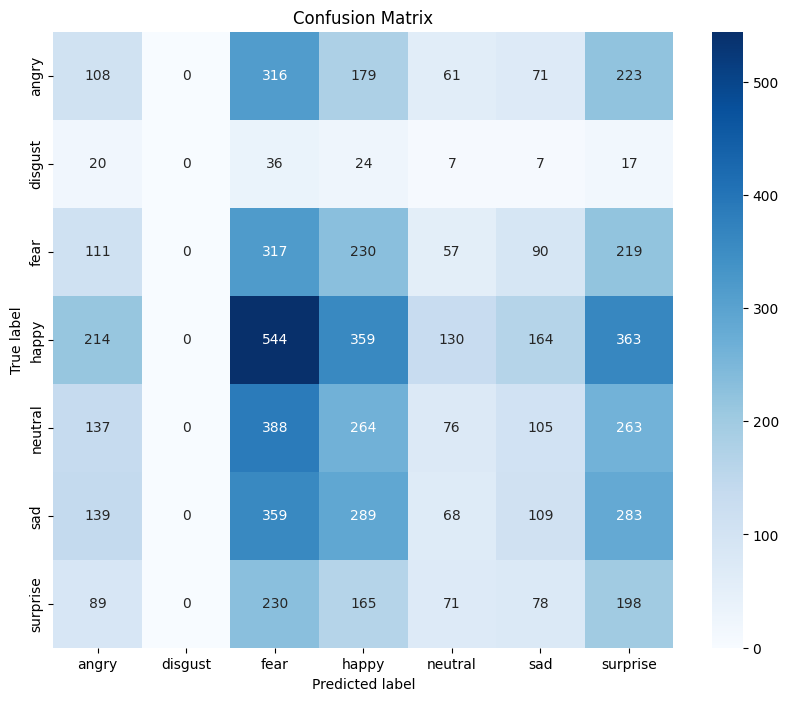

In [ ]:
# Assuming your true_classes and predicted_classes are already defined
true_classes = test_generator.classes
predicted_classes = np.argmax(model.predict(test_generator, steps=np.ceil(test_generator.samples/test_generator.batch_size)), axis=1)
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Printing the classification report
report = classification_report(true_classes,
                               predicted_classes,
                               target_names=class_labels,
                               zero_division=0)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

       angry       0.13      0.11      0.12       958
     disgust       0.00      0.00      0.00       111
        fear       0.14      0.31      0.20      1024
       happy       0.24      0.20      0.22      1774
     neutral       0.16      0.06      0.09      1233
         sad       0.17      0.09      0.12      1247
    surprise       0.13      0.24      0.17       831

    accuracy                           0.16      7178
   macro avg       0.14      0.14      0.13      7178
weighted avg       0.17      0.16      0.15      7178



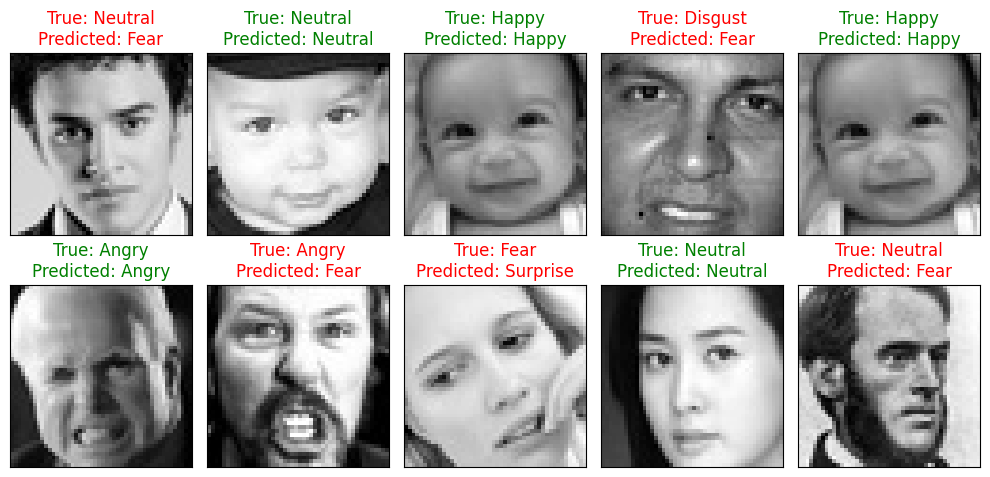

In [ ]:
# Emotion classes for the dataset
Emotion_Classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Assuming test_generator and model are already defined
batch_size = test_generator.batch_size

# Selecting a random batch from the test generator
Random_batch = np.random.randint(0, len(test_generator) - 1)

# Selecting random image indices from the batch
Random_Img_Index = np.random.randint(0, batch_size, 10)

# Setting up the plot
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Fetching the random image and its label
    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]], axis=0)

    # Making a prediction using the model
    Model_Prediction = np.argmax(model.predict(tf.expand_dims(Random_Img, axis=0), verbose=0), axis=1)[0]

    # Displaying the image
    ax.imshow(Random_Img.squeeze(), cmap='gray')  # Assuming the images are grayscale
    # Setting the title with true and predicted labels, colored based on correctness
    color = "green" if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction] else "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)

plt.tight_layout()
plt.show()
